ANALISIS DATA MOTOR BEKAS
REGRESI KONSUMSI BBM
SEGMENTASI REGRESI
ALGORITMA: GRADIENT BOOSTING REGRESSOR


Cell ini memuat seluruh library yang digunakan untuk pengolahan data, pemodelan regresi, evaluasi performa, dan visualisasi hasil analisis.

In [1]:
# Cell 0 - Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


Dataset motor bekas dibaca dari file CSV untuk memastikan data berhasil dimuat serta mengetahui jumlah baris, kolom, dan struktur awal data.

In [2]:
# Cell 1 - Load Dataset

df = pd.read_csv("/content/motor_second_dataset_r2_07_08.csv")

print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])
print("Nama kolom   :", df.columns.tolist())

df.head()


Jumlah baris : 10000
Jumlah kolom : 9
Nama kolom   : ['model', 'tahun', 'harga', 'transmisi', 'odometer', 'jenis', 'pajak', 'konsumsiBBM', 'mesin']


,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,CB150R,2016.09,18592.25,Automatic,89446.57,Trail,17.29,97.667755,125.78
1,PCX,2017.29,10843.41,Kopling,90669.96,Bebek,281.18,144.257761,148.40
2,CRF 150,2011.95,23036.99,Manual,113533.10,Bebek,175.88,107.259152,70.87
3,BeAT Street,2014.28,5057.38,Manual,7760.40,Skuter,209.76,106.213443,145.44
4,Verza,2017.72,13975.19,Manual,71616.58,Sport,157.55,88.710812,82.10


Cell ini menampilkan informasi tipe data dan statistik deskriptif guna memahami karakteristik serta distribusi nilai pada dataset.

In [3]:
# Cell 2 - Informasi Dataset

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        10000 non-null  object 
 1   tahun        10000 non-null  float64
 2   harga        10000 non-null  float64
 3   transmisi    10000 non-null  object 
 4   odometer     10000 non-null  float64
 5   jenis        10000 non-null  object 
 6   pajak        10000 non-null  float64
 7   konsumsiBBM  10000 non-null  float64
 8   mesin        10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


,tahun,harga,odometer,pajak,konsumsiBBM,mesin
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2014.936244,19182.365056,60124.983633,151.364346,82.494496,76.484008
std,2.312557,9004.913783,33825.195836,86.628016,30.793359,42.927975
min,2005.940016,-13540.992820,-64837.538653,-230.704456,-30.892639,-108.446894
25%,2013.235401,12587.672742,34873.163694,88.378953,61.491665,45.526144
50%,2014.928357,19127.700770,60144.414776,151.563664,82.776174,76.713323
75%,2016.619342,25740.270827,85135.063472,215.670868,103.604689,108.016468
max,2023.073883,59373.079350,183840.302723,471.623827,183.331371,223.002699


Data dibersihkan dari nilai kosong dan duplikasi agar kualitas data terjaga dan hasil pemodelan menjadi lebih valid.

In [4]:
# Cell 3 - Data Cleaning

print("Missing value per kolom:")
print(df.isnull().sum())

df = df.dropna().drop_duplicates()

print("Ukuran data setelah cleaning:", df.shape)


Missing value per kolom:
model          0
tahun          0
harga          0
transmisi      0
odometer       0
jenis          0
pajak          0
konsumsiBBM    0
mesin          0
dtype: int64
Ukuran data setelah cleaning: (10000, 9)


Kolom kategorik diubah menjadi numerik menggunakan Label Encoding karena model regresi hanya dapat memproses data berbentuk angka.

In [5]:
# Cell 4 - Encoding Data Kategorik

encoder = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col])

df.head()


,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,3,2016.09,18592.25,0,89446.57,3,17.29,97.667755,125.78
1,6,2017.29,10843.41,1,90669.96,0,281.18,144.257761,148.40
2,4,2011.95,23036.99,2,113533.10,0,175.88,107.259152,70.87
3,2,2014.28,5057.38,2,7760.40,1,209.76,106.213443,145.44
4,12,2017.72,13975.19,2,71616.58,2,157.55,88.710812,82.10


Data dipisahkan menjadi variabel input sebagai feature dan konsumsi BBM sebagai target yang akan diprediksi.

In [6]:
# Cell 5 - Feature dan Target

X = df.drop("konsumsiBBM", axis=1)
y = df["konsumsiBBM"]

print("Jumlah fitur :", X.shape[1])


Jumlah fitur : 8


Dataset dibagi menjadi data training dan testing untuk memungkinkan evaluasi performa model secara objektif.

In [7]:
# Cell 6 - Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data training :", X_train.shape)
print("Data testing  :", X_test.shape)


Data training : (8000, 8)
Data testing  : (2000, 8)


Model Gradient Boosting Regressor dilatih menggunakan data training untuk mempelajari hubungan antara fitur motor dan konsumsi BBM.

In [8]:
# Cell 7 - Training Gradient Boosting Regressor

gb_reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

Model menghasilkan prediksi pada data testing dan dievaluasi menggunakan MAE, RMSE, dan R² untuk mengukur tingkat kesalahan dan akurasi model.

In [9]:
# Cell 8 - Prediksi dan Evaluasi

from sklearn.metrics import mean_squared_error

y_pred = gb_reg.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("MAE  :", round(mae, 2))
print("RMSE :", round(rmse, 2))
print("R²   :", round(r2, 3))


MAE  : 8.44
RMSE : 10.55
R²   : 0.882


Grafik ditampilkan untuk membandingkan nilai konsumsi BBM aktual dan hasil prediksi guna melihat kedekatan prediksi model terhadap data sebenarnya.

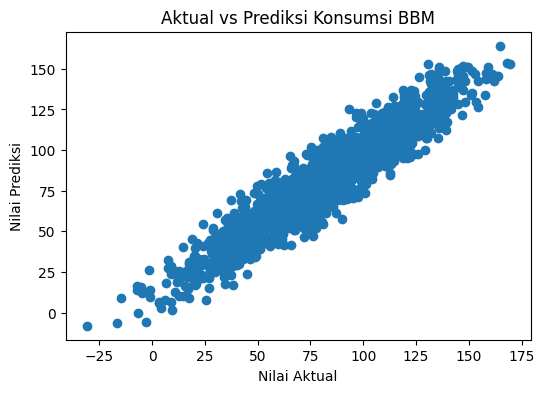

In [10]:
# Cell 9 - Visualisasi

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Aktual vs Prediksi Konsumsi BBM")
plt.show()


In [10]:
# Cell 9 - Simpan Hasil Prediksi

hasil_prediksi = X_test.copy()
hasil_prediksi["BBM_Aktual"]   = y_test.values
hasil_prediksi["BBM_Prediksi"] = y_pred

# Simpan ke file CSV
hasil_prediksi.to_csv(
    "hasil_prediksi_konsumsi_BBM.csv",
    index=False
)

print("File berhasil disimpan: hasil_prediksi_konsumsi_BBM.csv")
